In [3]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [4]:
# load the Social_Network_Ads dataset 

SNAdata = pd.read_csv(r"D:\00 Henotic\SRKR\Datasets\Social_Network_Ads.csv", header=0)

# Copy the file to back-up file

SNAdata_bk = SNAdata.copy()

# display first 5 records

SNAdata.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
# Display data information

SNAdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
# Character variables Gender to encode by using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

SNAdata['Gender'] = le.fit_transform(SNAdata['Gender'])
SNAdata.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [7]:
# Delete the variables which are influencing the target variable

del SNAdata['User ID']
SNAdata.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [10]:
# Identify variables for scaling

cols1 = ['Age', 'EstimatedSalary']

In [8]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in SNAdata.columns:
    if col != 'Purchased':
        IndepVar.append(col)

TargetVar = 'Purchased'

x = SNAdata[IndepVar]
y = SNAdata[TargetVar]

In [9]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=42)
x_test_F1 = x_test.copy()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 3), (80, 3), (320,), (80,))

In [11]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1])
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

# Naive Bayes model (GaussianNB) Algorithm

Confusion matrix : 
 [[22  7]
 [ 4 47]]
Outcome values : 
 22 7 4 47
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.76      0.80        29
           0       0.87      0.92      0.90        51

    accuracy                           0.86        80
   macro avg       0.86      0.84      0.85        80
weighted avg       0.86      0.86      0.86        80

Accuracy : 86.2 %
Precision : 84.6 %
Recall : 75.9 %
F1 Score : 0.8
Specificity or True Negative Rate : 92.2 %
Balanced Accuracy : 84.0 %
MCC : 0.698
roc_auc_score: 0.84


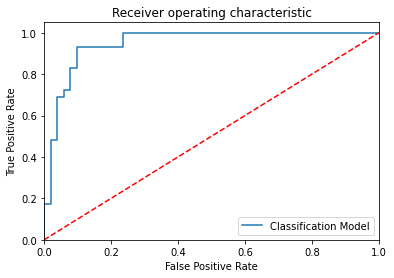

-----------------------------------------------------------------------------------------------------


In [12]:
# Training the Naive Bayes model (GaussianNB) on the Training set

from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

# Fit the model with train data

modelGNB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = modelGNB.predict(x_test)
y_pred_prob = modelGNB.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,modelGNB.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [13]:
# Load the result dataset

EMResults = pd.read_csv(r"D:\00 Henotic\SRKR\Datasets\HTResults.csv", header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# GaussianNB - Compare with other classification models

Model Name:  LogisticRegression()
Confusion matrix : 
 [[14 15]
 [ 2 49]]
Outcome values : 
 14 15 2 49
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.48      0.62        29
           0       0.77      0.96      0.85        51

    accuracy                           0.79        80
   macro avg       0.82      0.72      0.74        80
weighted avg       0.81      0.79      0.77        80

Accuracy : 78.8 %
Precision : 87.5 %
Recall : 48.3 %
F1 Score : 0.622
Specificity or True Negative Rate : 96.1 %
Balanced Accuracy : 72.2 %
MCC : 0.533
roc_auc_score: 0.722


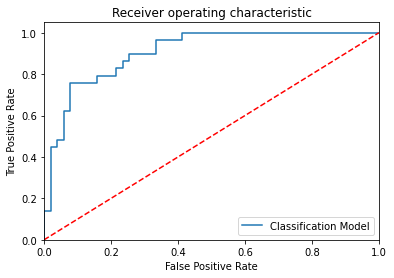

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[20  9]
 [ 5 46]]
Outcome values : 
 20 9 5 46
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.69      0.74        29
           0       0.84      0.90      0.87        51

    accuracy                           0.82        80
   macro avg       0.82      0.80      0.80        80
weighted avg       0.82      0.82      0.82        80

Accuracy : 82.5 %
Precision : 80.0 %
Recall : 69.0 %
F1 Score : 0.741
Specificity or True Negative Rate : 90.2 %
Balanced Accuracy : 79.6 %
MCC : 0.614
roc_auc_score: 0.796


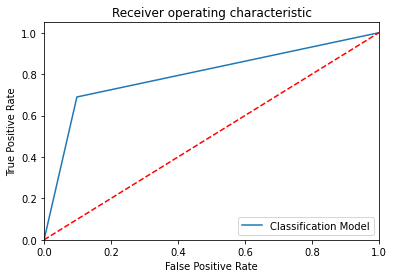

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[23  6]
 [ 5 46]]
Outcome values : 
 23 6 5 46
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.79      0.81        29
           0       0.88      0.90      0.89        51

    accuracy                           0.86        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.86      0.86      0.86        80

Accuracy : 86.2 %
Precision : 82.1 %
Recall : 79.3 %
F1 Score : 0.807
Specificity or True Negative Rate : 90.2 %
Balanced Accuracy : 84.8 %
MCC : 0.701
roc_auc_score: 0.848


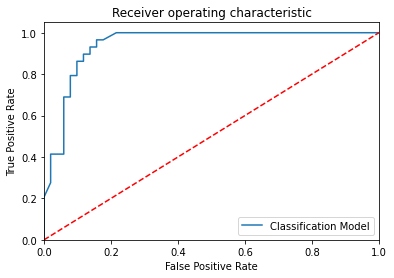

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[25  4]
 [ 5 46]]
Outcome values : 
 25 4 5 46
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.86      0.85        29
           0       0.92      0.90      0.91        51

    accuracy                           0.89        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80

Accuracy : 88.8 %
Precision : 83.3 %
Recall : 86.2 %
F1 Score : 0.847
Specificity or True Negative Rate : 90.2 %
Balanced Accuracy : 88.2 %
MCC : 0.759
roc_auc_score: 0.882


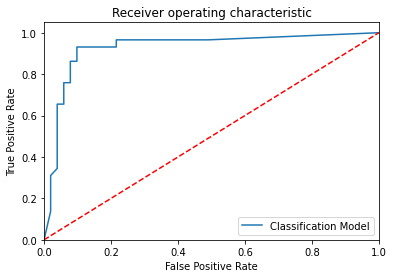

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[26  3]
 [ 4 47]]
Outcome values : 
 26 3 4 47
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.90      0.88        29
           0       0.94      0.92      0.93        51

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80

Accuracy : 91.2 %
Precision : 86.7 %
Recall : 89.7 %
F1 Score : 0.881
Specificity or True Negative Rate : 92.2 %
Balanced Accuracy : 91.0 %
MCC : 0.812
roc_auc_score: 0.909


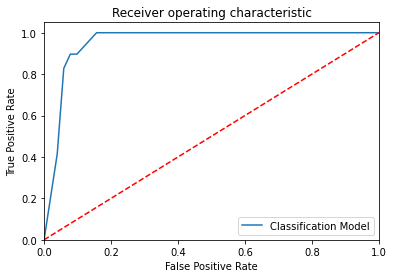

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[24  5]
 [ 5 46]]
Outcome values : 
 24 5 5 46
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.83      0.83        29
           0       0.90      0.90      0.90        51

    accuracy                           0.88        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.88      0.88      0.88        80

Accuracy : 87.5 %
Precision : 82.8 %
Recall : 82.8 %
F1 Score : 0.828
Specificity or True Negative Rate : 90.2 %
Balanced Accuracy : 86.5 %
MCC : 0.73
roc_auc_score: 0.865


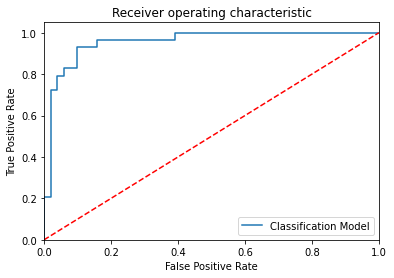

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[22  7]
 [ 4 47]]
Outcome values : 
 22 7 4 47
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.76      0.80        29
           0       0.87      0.92      0.90        51

    accuracy                           0.86        80
   macro avg       0.86      0.84      0.85        80
weighted avg       0.86      0.86      0.86        80

Accuracy : 86.2 %
Precision : 84.6 %
Recall : 75.9 %
F1 Score : 0.8
Specificity or True Negative Rate : 92.2 %
Balanced Accuracy : 84.0 %
MCC : 0.698
roc_auc_score: 0.84


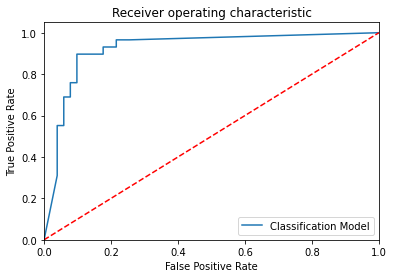

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[21  8]
 [ 4 47]]
Outcome values : 
 21 8 4 47
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.72      0.78        29
           0       0.85      0.92      0.89        51

    accuracy                           0.85        80
   macro avg       0.85      0.82      0.83        80
weighted avg       0.85      0.85      0.85        80

Accuracy : 85.0 %
Precision : 84.0 %
Recall : 72.4 %
F1 Score : 0.778
Specificity or True Negative Rate : 92.2 %
Balanced Accuracy : 82.3 %
MCC : 0.67
roc_auc_score: 0.823


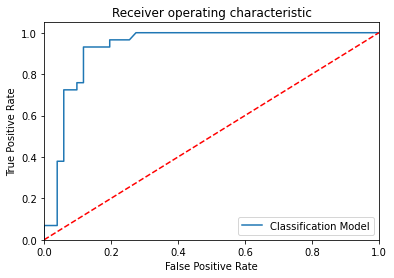

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[21  8]
 [ 4 47]]
Outcome values : 
 21 8 4 47
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.72      0.78        29
           0       0.85      0.92      0.89        51

    accuracy                           0.85        80
   macro avg       0.85      0.82      0.83        80
weighted avg       0.85      0.85      0.85        80

Accuracy : 85.0 %
Precision : 84.0 %
Recall : 72.4 %
F1 Score : 0.778
Specificity or True Negative Rate : 92.2 %
Balanced Accuracy : 82.3 %
MCC : 0.67
roc_auc_score: 0.823


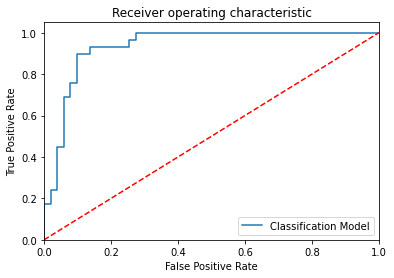

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[22  7]
 [ 4 47]]
Outcome values : 
 22 7 4 47
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.76      0.80        29
           0       0.87      0.92      0.90        51

    accuracy                           0.86        80
   macro avg       0.86      0.84      0.85        80
weighted avg       0.86      0.86      0.86        80

Accuracy : 86.2 %
Precision : 84.6 %
Recall : 75.9 %
F1 Score : 0.8
Specificity or True Negative Rate : 92.2 %
Balanced Accuracy : 84.0 %
MCC : 0.698
roc_auc_score: 0.84


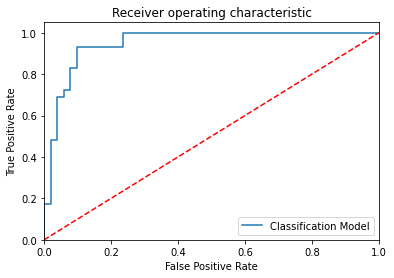

-----------------------------------------------------------------------------------------------------


In [14]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     min_impurity_split=None, init=None, random_state=None,
                                     max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG, ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [15]:
# Results with comparing the all the algorithms 

#EMResults.to_csv("D://00 Henotic//SRKR//Datasets//Results//EMResults_22.csv")

EMResults.head(20)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),14,15,2,49,0.788,0.875,0.483,0.622,0.961,0.533,0.721771,0.722
1,DecisionTreeClassifier(),20,9,5,46,0.825,0.800,0.690,0.741,0.902,0.614,0.795808,0.796
2,"(DecisionTreeClassifier(max_features='auto', r...",23,6,5,46,0.862,0.821,0.793,0.807,0.902,0.701,0.847532,0.848
3,"(ExtraTreeClassifier(random_state=1604900908),...",25,4,5,46,0.888,0.833,0.862,0.847,0.902,0.759,0.882015,0.882
4,KNeighborsClassifier(),26,3,4,47,0.912,0.867,0.897,0.881,0.922,0.812,0.909060,0.910
5,SVC(probability=True),24,5,5,46,0.875,0.828,0.828,0.828,0.902,0.730,0.864773,0.865
6,(DecisionTreeClassifier(random_state=211154686...,22,7,4,47,0.862,0.846,0.759,0.800,0.922,0.698,0.840095,0.840
7,([DecisionTreeRegressor(criterion='friedman_ms...,21,8,4,47,0.850,0.840,0.724,0.778,0.922,0.670,0.822853,0.823
8,LGBMClassifier(),21,8,4,47,0.850,0.840,0.724,0.778,0.922,0.670,0.822853,0.823
9,GaussianNB(),22,7,4,47,0.862,0.846,0.759,0.800,0.922,0.698,0.840095,0.840
